In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
diamonds = pd.read_csv('data/diamonds_train.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


In [34]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [36]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


<AxesSubplot:xlabel='table', ylabel='Count'>

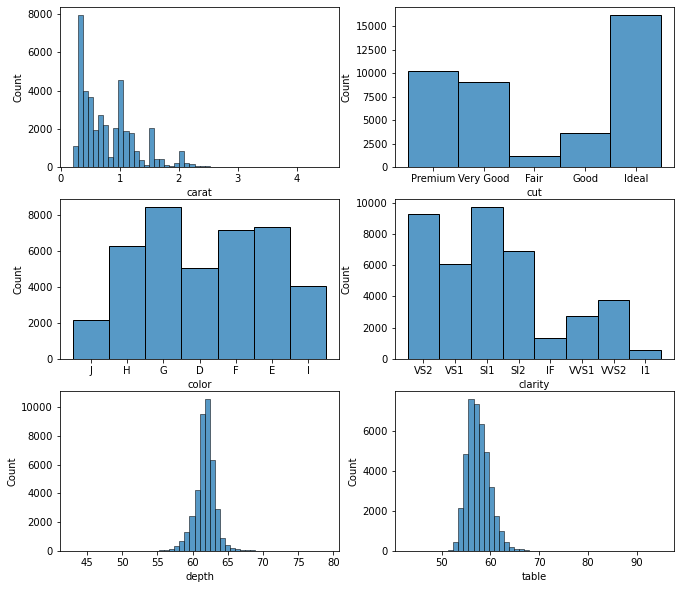

In [33]:
f, axes = plt.subplots(3,2, figsize=(11,10))

sns.histplot(data=diamonds, x = 'carat', bins = 50, ax=axes[0,0])
sns.histplot(data=diamonds, x = 'cut', ax=axes[0,1])
sns.histplot(data=diamonds, x = 'color', ax=axes[1,0])
sns.histplot(data=diamonds, x = 'clarity', ax=axes[1,1])
sns.histplot(data=diamonds, x = 'depth', bins = 50, ax=axes[2,0])
sns.histplot(data=diamonds, x = 'table', bins = 50, ax=axes[2,1])

In [44]:
corr = diamonds.corr()
corr.style.background_gradient(cmap='coolwarm')
# carat, as well as x, y, z are the values that most influence the price

,carat,depth,table,price,x,y,z
carat,1.000000,0.026528,0.183392,0.921935,0.975688,0.951667,0.967570
depth,0.026528,1.000000,-0.293114,-0.014864,-0.026348,-0.030966,0.094655
table,0.183392,-0.293114,1.000000,0.130111,0.196059,0.184673,0.155189
price,0.921935,-0.014864,0.130111,1.000000,0.885848,0.866163,0.874500
x,0.975688,-0.026348,0.196059,0.885848,1.000000,0.973712,0.984876
y,0.951667,-0.030966,0.184673,0.866163,0.973712,1.000000,0.964828
z,0.967570,0.094655,0.155189,0.874500,0.984876,0.964828,1.000000


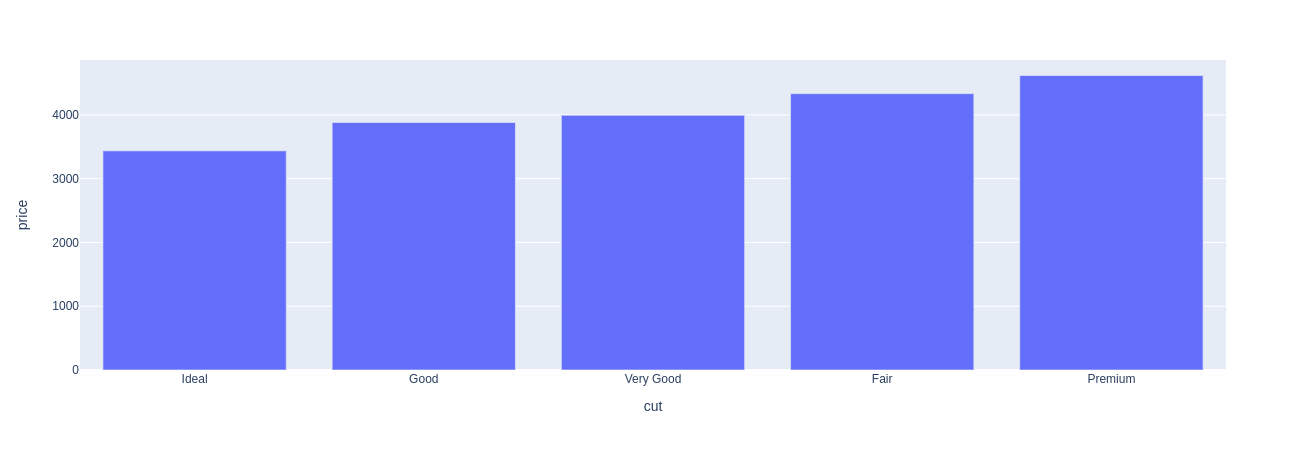

In [57]:
cut_prices = diamonds[['cut', 'price']].groupby('cut', as_index=False).agg('mean').sort_values('price')

px.bar(cut_prices, x='cut', y='price')

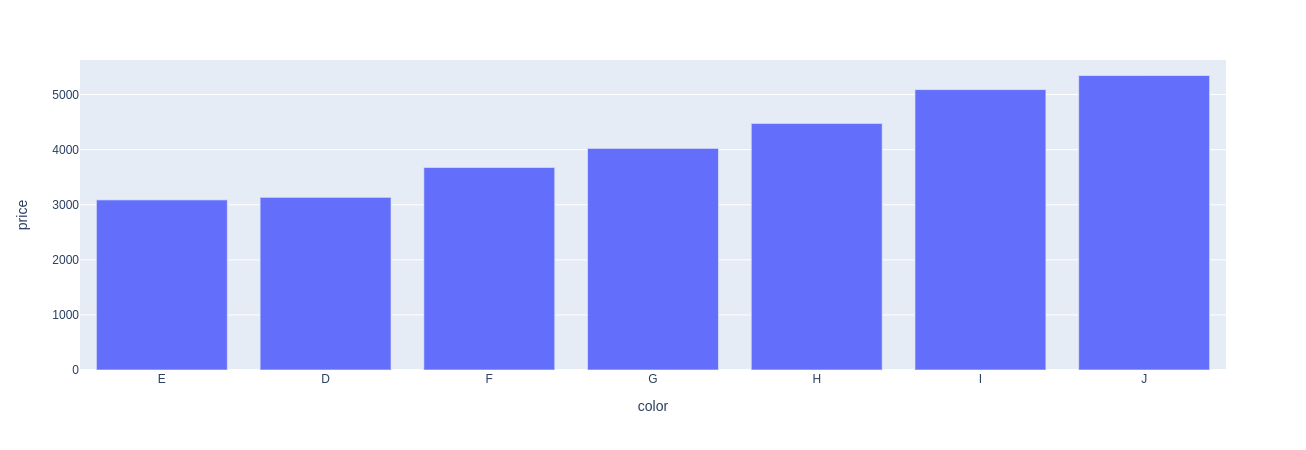

In [4]:
color_prices = diamonds[['color', 'price']].groupby('color', as_index=False).agg('mean').sort_values('price')

px.bar(color_prices, x='color', y='price')



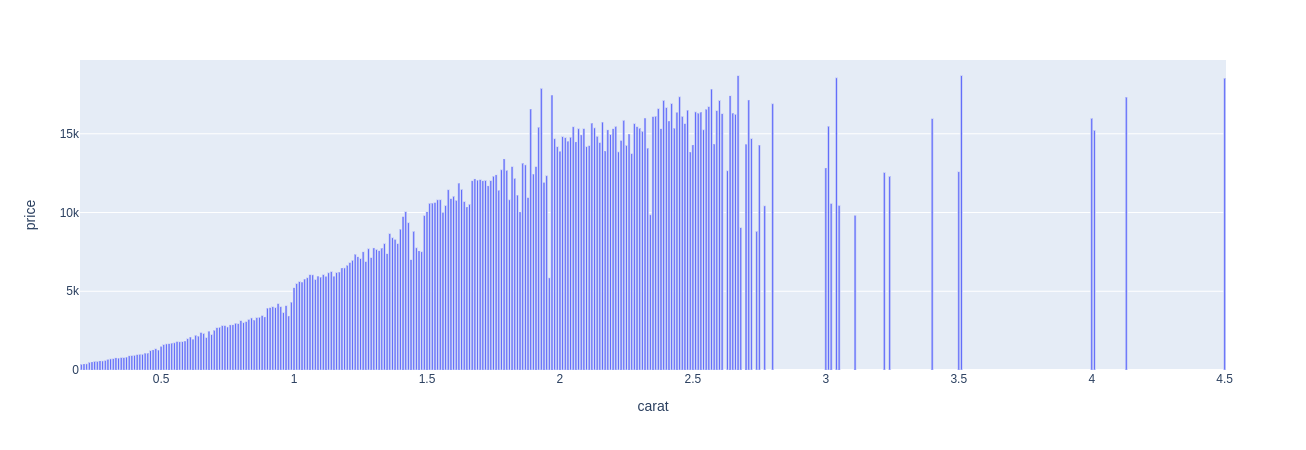

In [45]:
carat_prices = diamonds[['carat', 'price']].groupby('carat', as_index=False).agg('mean').sort_values('price')

px.bar(carat_prices, x='carat', y='price')


<AxesSubplot:xlabel='table', ylabel='price'>

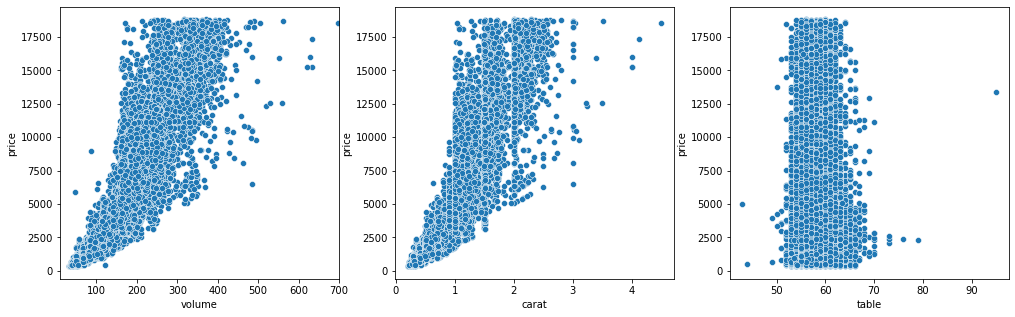

In [58]:
diamonds['volume'] = diamonds['x'] * diamonds['y'] * diamonds['z']

fig, axes = plt.subplots(1,3, figsize=(17,5))

sns.scatterplot(ax=axes[0], data=diamonds, x='volume', y='price').set(xlim=(10,700))
sns.scatterplot(ax=axes[1], data=diamonds, x='carat', y='price')
sns.scatterplot(ax=axes[2], data=diamonds, x='table', y='price')


# Bonus

In [2]:
from scipy.stats import ttest_rel, ttest_1samp, ttest_ind

In [13]:
# Test 1

"""Null H: Diamond prices are NOT significantly different from 4000$
Alternative H: Prices ARE significantly different"""

diamond_prices = diamonds['price'].tolist()

prices_result = ttest_1samp(diamond_prices, 4000)
display(prices_result.statistic)
display(prices_result.pvalue < 0.05)
prices_result.pvalue

#P value is lower than 5% so we can accept our alternative hypothsis, and confirm that the average prace IS significantly different from 4000$

-3.604902369125729

True

0.00031264532833074845

In [12]:
# Sub-Test 1

"""Null H: Subgroups are NOT significantly different from each other
Alternative H: Subgroups ARE significantly different from each other"""

fair_g = diamonds.loc[(diamonds['cut'] == 'Fair' ) & (diamonds['color'] == 'G')]
fair_i = diamonds.loc[(diamonds['cut'] == 'Fair' ) & (diamonds['color'] == 'I')]

ttest_ind(fair_g['price'], fair_i['price'], equal_var=False)

# P value is bigger than 5% (test failed) so we can't reject null hypothesis 

Ttest_indResult(statistic=0.03626636629279179, pvalue=0.9710929771417586)

In [7]:
# Sub-Test 2

"""Null H: Subgroups are NOT significantly different from each other
Alternative H: Subgroups ARE significantly different from each other"""

good_e = diamonds.loc[(diamonds['cut'] == 'Good' ) & (diamonds['color'] == 'E')]
good_f = diamonds.loc[(diamonds['cut'] == 'Good' ) & (diamonds['color'] == 'F')]

ttest_ind(good_e['price'], good_f['price'], equal_var=False)

# P value is bigger than 5% (test failed) so we can't reject null hypothesis 

Ttest_indResult(statistic=-0.4406178833837438, pvalue=0.6595600994188809)

In [23]:
# Sub-Test 3

"""Null H: Subgroups are NOT significantly different from each other
Alternative H: Subgroups ARE significantly different from each other"""

ideal_d = diamonds.loc[(diamonds['cut'] == 'Ideal' ) & (diamonds['color'] == 'D')]
ideal_e = diamonds.loc[(diamonds['cut'] == 'Ideal' ) & (diamonds['color'] == 'E')]

ttest_ind(ideal_d['price'], ideal_e['price'], equal_var=True)

# P value is bigger than 5% so we must reject our alternative hypothesis, prices are NOT significantly different

Ttest_indResult(statistic=-0.5353150115731534, pvalue=0.5924555216763925)

In [8]:
# Sub-Test 4

"""Null H: Subgroups are NOT significantly different from each other
Alternative H: Subgroups ARE significantly different from each other"""

premium_d = diamonds.loc[(diamonds['cut'] == 'Premium' ) & (diamonds['color'] == 'D')]
premium_e = diamonds.loc[(diamonds['cut'] == 'Premium' ) & (diamonds['color'] == 'E')]

ttest_ind(premium_d['price'], premium_e['price'], equal_var=False)


# P value is bigger than 5% (test failed) so we can't reject null hypothesis 

Ttest_indResult(statistic=0.4238712765446736, pvalue=0.6716959865958436)

In [9]:
# Sub-Test 5

"""Null H: Subgroups are NOT significantly different from each other
Alternative H: Subgroups ARE significantly different from each other"""

very_good_i = diamonds.loc[(diamonds['cut'] == 'Very Good' ) & (diamonds['color'] == 'I')]
very_good_j = diamonds.loc[(diamonds['cut'] == 'Very Good' ) & (diamonds['color'] == 'J')]

ttest_ind(very_good_i['price'], very_good_j['price'], equal_var=False)


# P value is bigger than 5% (test failed) so we can't reject null hypothesis 

Ttest_indResult(statistic=0.34857584108266776, pvalue=0.7274714598286438)

In [10]:
# Sub-Test 6

"""Null H: Subgroups are NOT significantly different from each other
Alternative H: Subgroups ARE significantly different from each other"""

all_d = diamonds.loc[diamonds['color'] == 'D']
all_e = diamonds.loc[diamonds['color'] == 'E']

ttest_ind(all_d['price'], all_e['price'], equal_var=False)


# P value is bigger than 5% (test failed) so we can't reject null hypothesis 

Ttest_indResult(statistic=0.7646978610927021, pvalue=0.44446798501477136)